In [22]:
pip install --upgrade tensorflow keras Pillow

In [23]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
%cd "/content/drive/MyDrive/Semestre10/Computación/M2/datasetP"
!ls

/content/drive/MyDrive/Semestre10/Computación/M2/datasetP
augmented  test  train


In [25]:
#Imports

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from PIL import Image, UnidentifiedImageError
import io
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
# Añadir los paths de las carpetas de 'train' y 'test'
train_dir = os.path.join('train')
test_dir = os.path.join('test')

# Empezamos con generación de datos en una variable llamada 'train_datagen'.
# Entrenamos el modelo al mismo tiempo que la generación de datos para no
# perder el tiempo y hacer uso óptimo de la RAM.

# Usamos la función ImageDataGenerator de TensorFlow
train_datagen = ImageDataGenerator(
							rescale = 1./255, # Reescalamos las imágenes
							rotation_range = 10, # Las rotamos levemente (10 grados)
							width_shift_range = 0.2, # Permitimos que se ensanche la imagen
							zoom_range = 0.3, # Hacemos zoom
							horizontal_flip = True) #Volteamos la imagen

# Y BAM! Nuevos datos!

Found 7384 images belonging to 5 classes.


<Figure size 640x480 with 0 Axes>

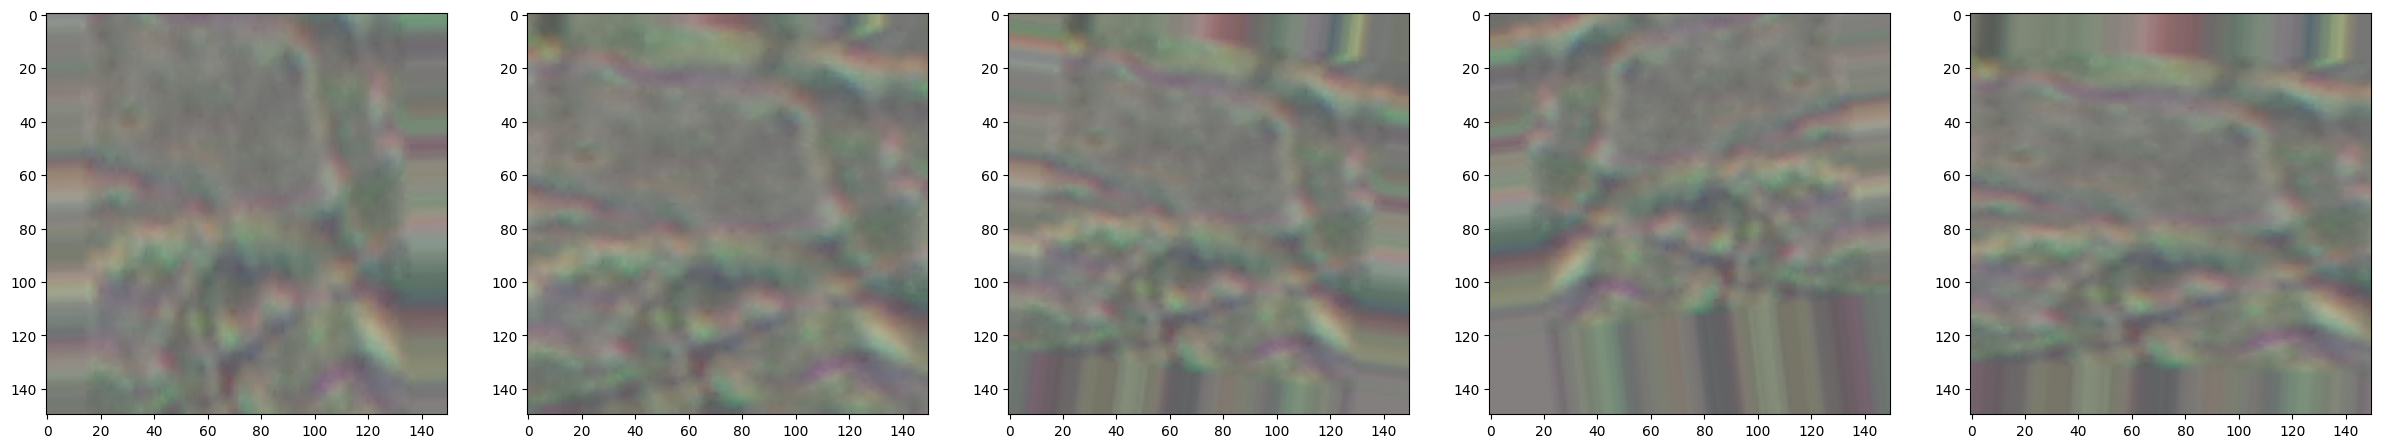

In [27]:
# Alimentamos los datos nuevos de 'train_datagen' a la función 'flow_from_directory'
# de TensorFlow
train_generator = train_datagen.flow_from_directory(
							train_dir, # le damos el path de entrenamiento
							target_size = (150, 150),
							# batch_size = 1 porque la RAM es un relajo XD
							batch_size = 1, # la cantidad de imágenes por conversión
							class_mode ='categorical', # modo categórico porque tenemos
							# 5 clases datos
							)

# Mostramos las nuevas fotos
plt.figure()
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

Found 7384 images belonging to 5 classes.
(8, 150, 150, 3)
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


<Figure size 640x480 with 0 Axes>

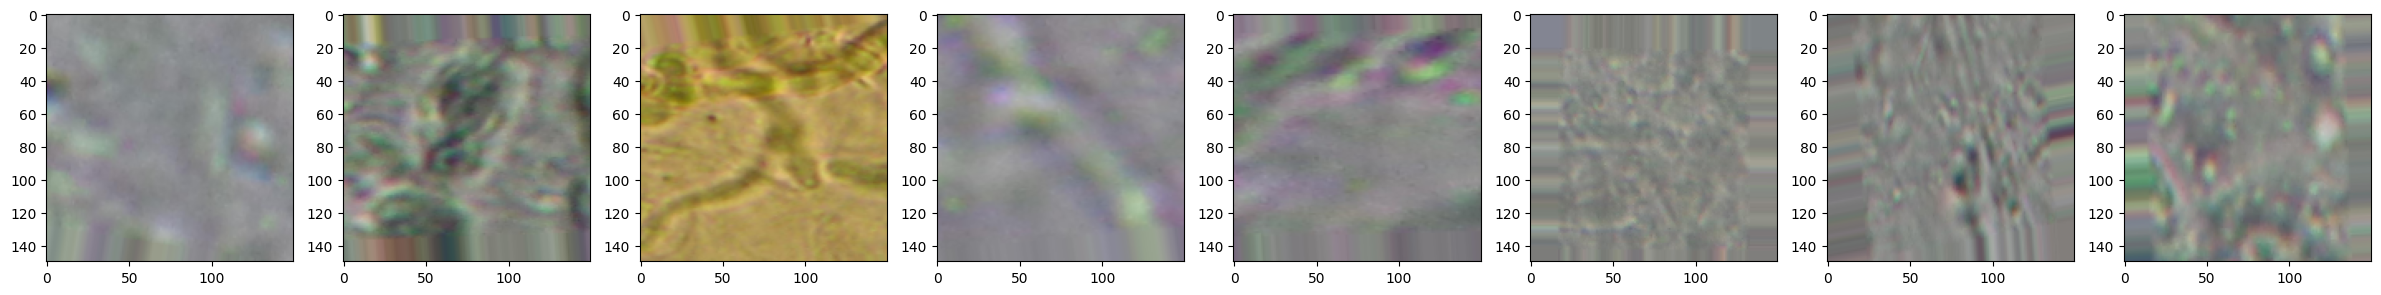

In [28]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='categorical',
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

In [29]:
path = "/content/drive/MyDrive/Semestre10/Computación/M2/datasetP/"

train_generator = train_datagen.flow_from_directory(
							"/content/drive/MyDrive/Semestre10/Computación/M2/datasetP/train",
							target_size = (150, 150),
							batch_size = 32,
							class_mode ='categorical',
							save_to_dir= path + '/augmented',
              save_prefix='aug',
              save_format='png'
							)

Found 7384 images belonging to 5 classes.


In [30]:
# Inicio de la red neuronal convolutiva

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(5,activation='relu'))

model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 219040)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │     3,504,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,505,021 (13.37 MB)

 Trainable params: 3,505,021 (13.37 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# ESTA REVISIÓN DE ARCHIVOS FUE HECHA POR GEMINI AI PARA REVISAR LOS ARCHIVOS
# UNO POR UNO DEBIDO A QUE SALÍA UN ERROR DONDE NO SE PODÍA ENTRENAR EL MODELO
# POR QUE LOS ARCHIVOS ESTABAN O CORRUPTOS, O INCORRECTOS. TRAS CONSULTAR CON LA
# IA CÓMO REVISAR MIS DOCUMENTOS, HIZO PROPUESTA DE UN DEBUGGING REVISANDO SI
# ALGUNO DE LOS ARCHIVOS ESTABA CAUSANDO EL PROBLEMA. ENCONTRÓ UNA IMAGEN
# CORRUPTA DE ENTRE 9000. TRAS ELIMINARLA, EL MODELO ENTRENÓ SIN PROBLEMA. SIN
# EMBARGO, EXPLICO EL CÓDIGO DEL SIGUIENTE BLOQUE CON MIS PALABRAS.

image_paths_to_check = []

for root, _, files in os.walk('/content/drive/MyDrive/Semestre10/Computación/M2/datasetP/train'):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            image_paths_to_check.append(os.path.join(root, file))

print(f"Checking {len(image_paths_to_check)} potential image files...")

problematic_files = []
for img_path in image_paths_to_check:
    try:
        with open(img_path, 'rb') as f:
            img_bytes = f.read()
        # Try opening the image using PIL
        Image.open(io.BytesIO(img_bytes))
    except UnidentifiedImageError:
        problematic_files.append(img_path)
        print(f"ERROR: Could not identify image file: {img_path}")
    except Exception as e:
        print(f"OTHER ERROR for {img_path}: {e}")

if problematic_files:
    print("\n--- Summary of Problematic Files ---")
    for p_file in problematic_files:
        print(p_file)
else:
    print("\nNo problematic image files found during manual check.")


Checking 7384 potential image files...

No problematic image files found during manual check.


Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 180s 772ms/step - acc: 0.4807 - loss: 1.6906
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 200s 769ms/step - acc: 0.4887 - loss: 1.3981
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 177s 768ms/step - acc: 0.4767 - loss: 1.3887
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 178s 773ms/step - acc: 0.4804 - loss: 1.3835
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 201s 770ms/step - acc: 0.4869 - loss: 1.3647


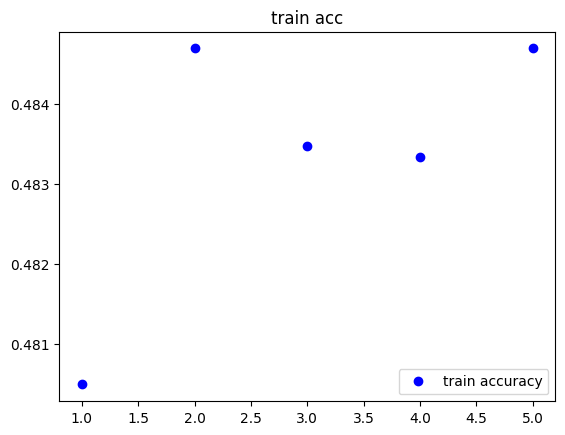

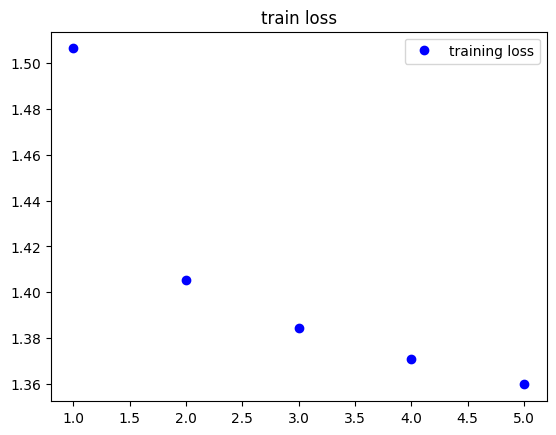

In [32]:
history = model.fit(
						train_generator,
						epochs = 5)


acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()